In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Training\Academy\Statistics (Python)\Datasets")
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import root_mean_squared_error
from pmdarima.arima import auto_arima

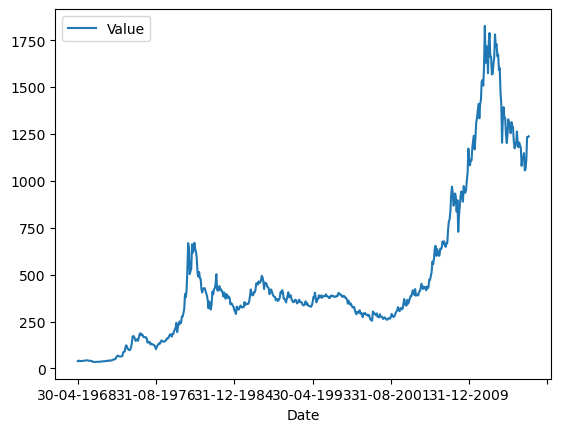

In [2]:
bnk = pd.read_csv("BUNDESBANK-BBK01_WT5511.csv",index_col=0)
bnk.plot()
plt.show()

In [3]:
y = bnk['Value']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((565,), (12,))

In [4]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True,
                  seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5615.321, Time=1.79 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5622.164, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5619.560, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5618.957, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5622.101, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=5613.420, Time=1.68 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=5611.710, Time=3.65 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=5617.318, Time=4.29 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=5622.630, Time=2.39 sec
 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=5626.629, Time=3.09 sec
 ARIMA(2,1,3)(0,0,2)[12] intercept   : AIC=5626.630, Time=3.92 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5621.194, Time=2.33 sec
 ARIMA(1,1,3)(0,0,2)[12] inte

In [5]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, y_pred)

116.04933209383046

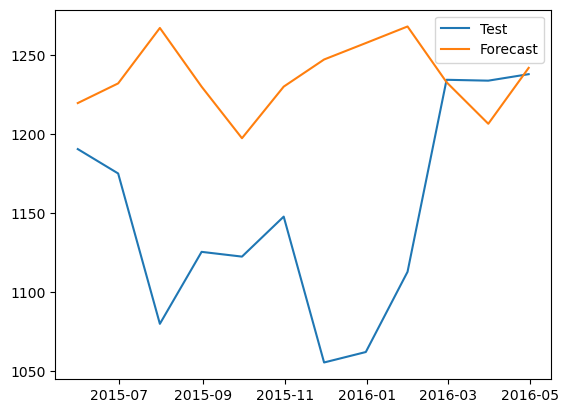

In [6]:
y_test.index = y_pred.index
plt.plot(y_test, label='Test')
plt.plot(y_pred,label='Forecast')
plt.legend()
plt.show()

In [7]:
y_test

2015-05-31    1190.40
2015-06-30    1175.00
2015-07-31    1080.05
2015-08-31    1125.50
2015-09-30    1122.50
2015-10-31    1147.75
2015-11-30    1055.65
2015-12-31    1062.25
2016-01-31    1112.90
2016-02-29    1234.15
2016-03-31    1233.60
2016-04-30    1237.70
Freq: ME, Name: Value, dtype: float64

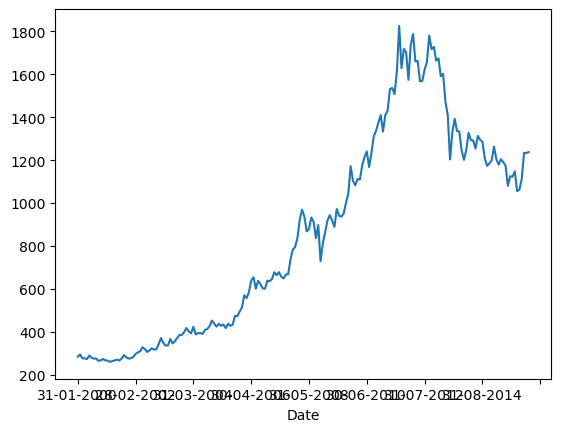

In [8]:
y_short = y[-196:]
y_short.plot()
plt.show()

In [9]:
y_train = y_short[:-12]
y_test = y_short[-12:]
y_train.shape, y_test.shape

((184,), (12,))

In [10]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True,
                  seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1981.002, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1980.289, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1979.837, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1980.605, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1977.838, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1979.837, Time=0.26 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1981.190, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1979.744, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1979.706, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1978.296, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1981.457, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1978.185, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12] intercept
Total fit time: 2.761 seconds


In [11]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, y_pred)

105.16247134651469

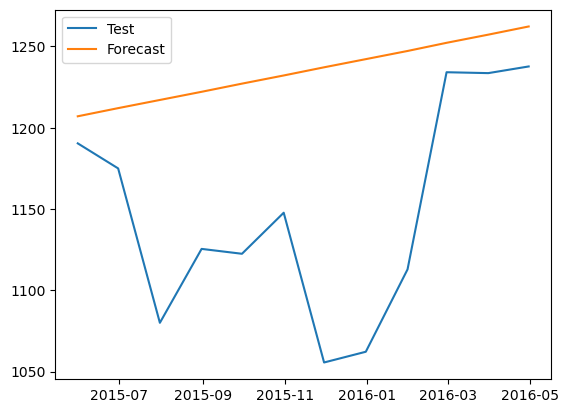

In [12]:
y_test.index = y_pred.index
plt.plot(y_test, label='Test')
plt.plot(y_pred,label='Forecast')
plt.legend()
plt.show()

### AusGas

In [14]:
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import root_mean_squared_error

In [15]:
aus = pd.read_csv("AusGas.csv", index_col=0)
aus.columns

Index(['GasProd'], dtype='object')

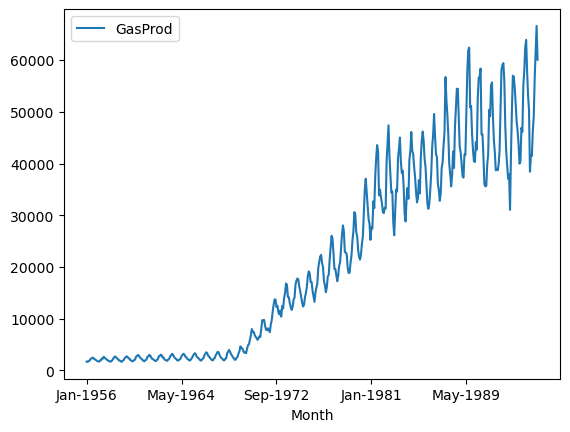

In [16]:
aus.plot()
plt.show()

In [17]:
y = aus['GasProd']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((464,), (12,))

In [18]:
y_test

Month
Sep-1994    57784
Oct-1994    53231
Nov-1994    50354
Dec-1994    38410
Jan-1995    41600
Feb-1995    41471
Mar-1995    46287
Apr-1995    49013
May-1995    56624
Jun-1995    61739
Jul-1995    66600
Aug-1995    60054
Name: GasProd, dtype: int64

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


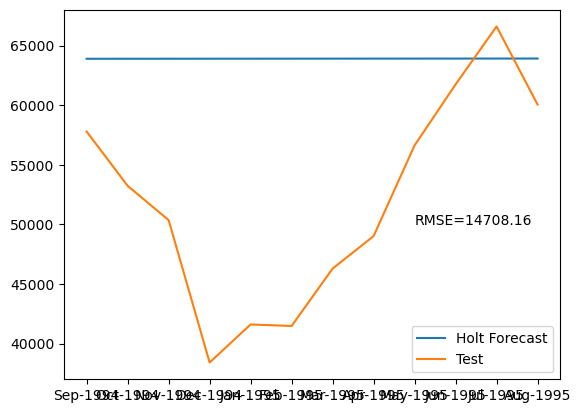

In [19]:
holt = Holt(y_train, damped_trend=True)
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_test))
holt_fcast = pd.Series(fcast1, index=y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
holt_fcast.index = y_test.index
plt.plot(holt_fcast,label='Holt Forecast')
plt.plot(y_test,label='Test')
plt.text(8,50000, "RMSE="+str(error))
plt.legend(loc='best')
plt.show()

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


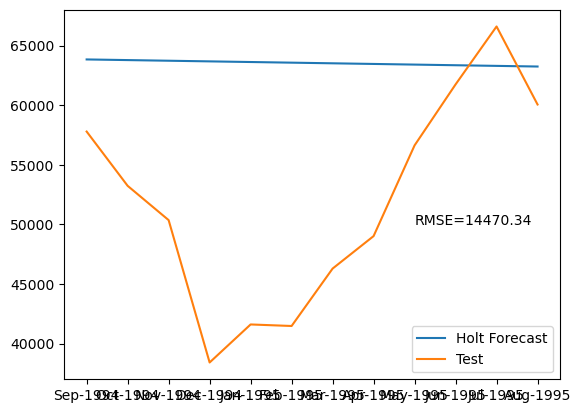

In [20]:
holt = Holt(y_train)
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_test))
holt_fcast = pd.Series(fcast1, index=y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
holt_fcast.index = y_test.index
plt.plot(holt_fcast,label='Holt Forecast')
plt.plot(y_test,label='Test')
plt.text(8,50000, "RMSE="+str(error))
plt.legend(loc='best')
plt.show()

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


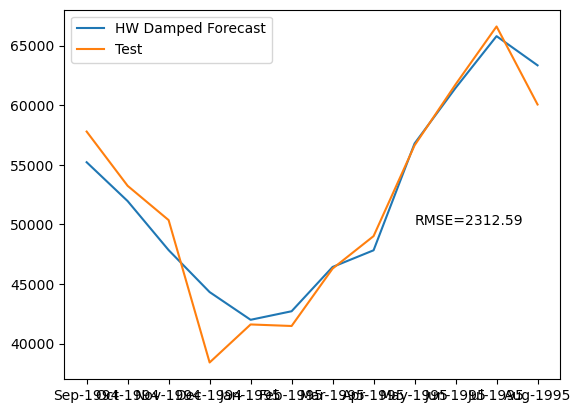

In [21]:
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='mul', damped_trend=True)
fit3 = hw_m.fit()
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index=y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
y_test.index = hw_m_fcast.index
plt.plot(hw_m_fcast, label='HW Damped Forecast')
plt.plot(y_test, label='Test')
plt.text(8,50000, "RMSE="+str(error))
plt.legend(loc='best')
plt.show()

In [22]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True,
                  seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8632.352, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8255.565, Time=0.68 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8438.509, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8631.502, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8589.946, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=8177.000, Time=1.20 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=8438.053, Time=0.51 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=8218.619, Time=2.13 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=8198.962, Time=2.43 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=8371.138, Time=0.99 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=4.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8219.426, Time=0.84 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

In [23]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, y_pred)

2923.7033935900245

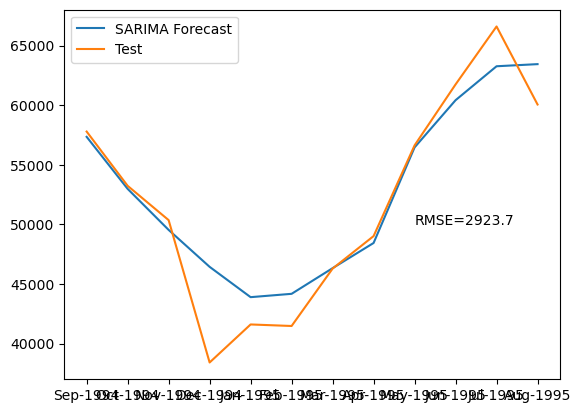

In [24]:
y_pred.index = y_test.index
error = round(root_mean_squared_error(y_test, y_pred), 2)
plt.text(8,50000, "RMSE="+str(error))
plt.plot(y_pred, label='SARIMA Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

#### Shampoo Sales 

In [26]:
shamp = pd.read_csv("sales-of-shampoo-over-a-three-ye.csv", index_col=0)
y = shamp['Sales of shampoo over a three year period']
y.shape

(36,)

In [27]:
y_train = y[:-6]
y_test = y[-6:]
y_train.shape, y_test.shape

((30,), (6,))

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


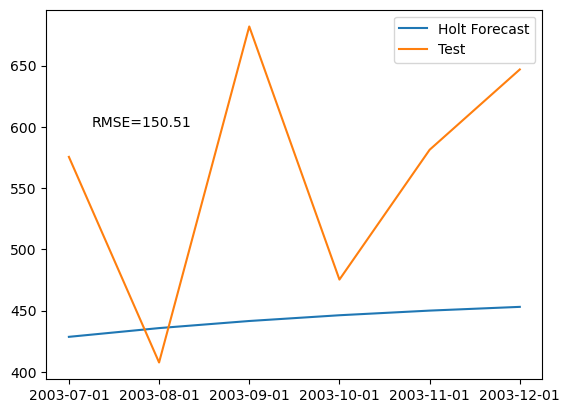

In [28]:
holt = Holt(y_train, exponential=True, damped_trend=True)
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_test))
holt_fcast = pd.Series(fcast1, index=y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
holt_fcast.index = y_test.index
plt.plot(holt_fcast,label='Holt Forecast')
plt.plot(y_test,label='Test')
plt.text(0.25,600, "RMSE="+str(error))
plt.legend(loc='best')
plt.show()

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


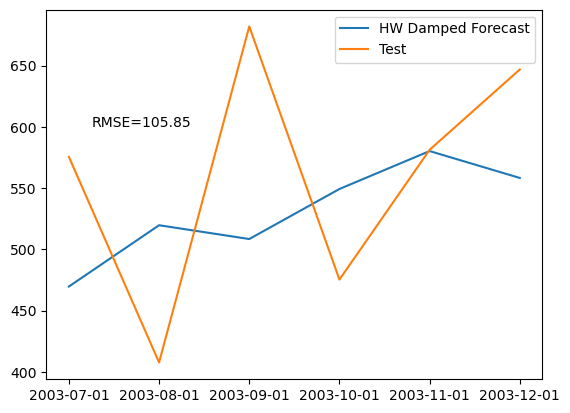

In [29]:
alpha, beta, gamma = 0.2, 0.5, 0.2
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='add')
fit3 = hw_m.fit(smoothing_level=alpha, smoothing_trend=beta,
                smoothing_seasonal=gamma)
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index=y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
y_test.index = hw_m_fcast.index
plt.plot(hw_m_fcast, label='HW Damped Forecast')
plt.plot(y_test, label='Test')
plt.text(0.25,600, "RMSE="+str(error))
plt.legend(loc='best')
plt.show()

In [30]:
fit3.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.5,
 'smoothing_seasonal': 0.2,
 'damping_trend': nan,
 'initial_level': 200.04924232763432,
 'initial_trend': -6.624659289490733,
 'initial_seasons': array([ 17.79328135, -17.40442507, -30.25275233,  -4.30603399,
        -30.38557147,  -1.31105321,   3.13452882,  31.65206277,
          0.85317965,  16.40435799,  41.0281792 ,  -7.23862432]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [31]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=346.449, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=329.759, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.826, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=344.577, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.141, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=329.032, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=326.967, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=329.338, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.335 seconds


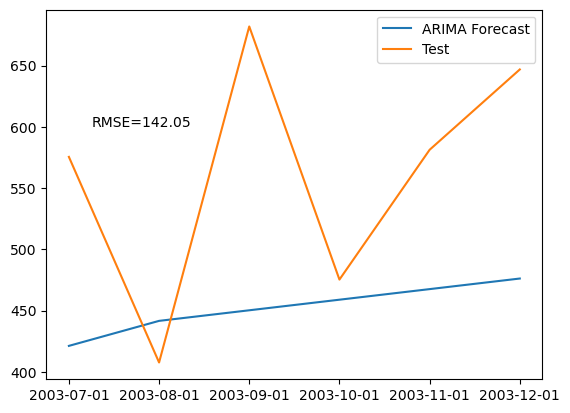

In [32]:
y_pred = model.predict(n_periods=len(y_test))
y_pred.index = y_test.index
error = round(root_mean_squared_error(y_test, y_pred), 2)
plt.text(0.25,600, "RMSE="+str(error))
plt.plot(y_pred, label='ARIMA Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

In [33]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True,
                  seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=346.449, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=325.552, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=344.577, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=329.759, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=327.544, Time=0.31 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=327.542, Time=0.35 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=325.742, Time=0.18 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=344.139, Time=0.10 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=325.838, Time=0.21 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=322.439, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=327.141, Time=0.07 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=32

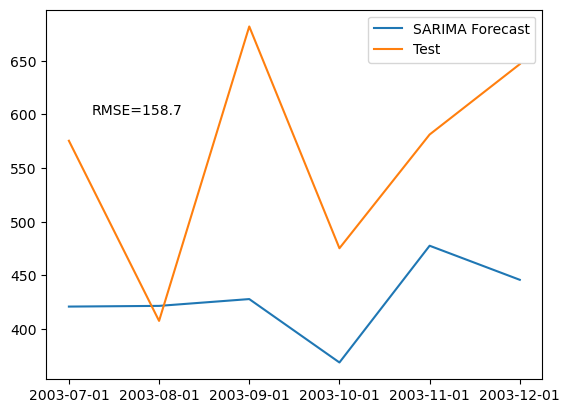

In [34]:
y_pred = model.predict(n_periods=len(y_test))
y_pred.index = y_test.index
error = round(root_mean_squared_error(y_test, y_pred), 2)
plt.text(0.25,600, "RMSE="+str(error))
plt.plot(y_pred, label='SARIMA Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

## WGEM

In [36]:
wgem = pd.read_csv("WGEM-IND_CPTOTNSXN.csv",index_col=0)
y = wgem['Value']
y_train = y[:-4]
y_test = y[-4:]
y_train.shape, y_test.shape

((27,), (4,))

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


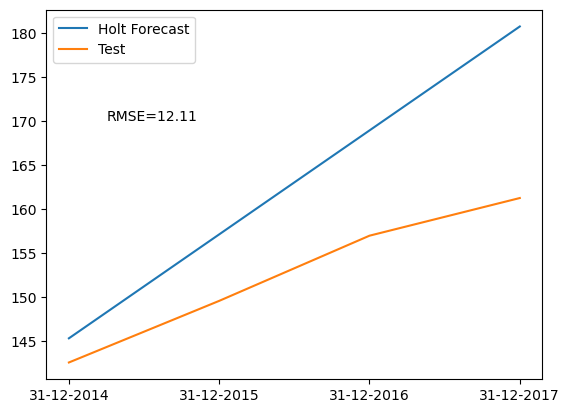

In [37]:
holt = Holt(y_train)
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_test))
holt_fcast = pd.Series(fcast1, index=y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
holt_fcast.index = y_test.index
plt.plot(holt_fcast,label='Holt Forecast')
plt.plot(y_test,label='Test')
plt.text(0.25,170, "RMSE="+str(error))
plt.legend(loc='best')
plt.show()

In [38]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.240, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=92.766, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=92.810, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.165, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=91.712, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=91.639, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=93.617, Time=0.04 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.408 seconds


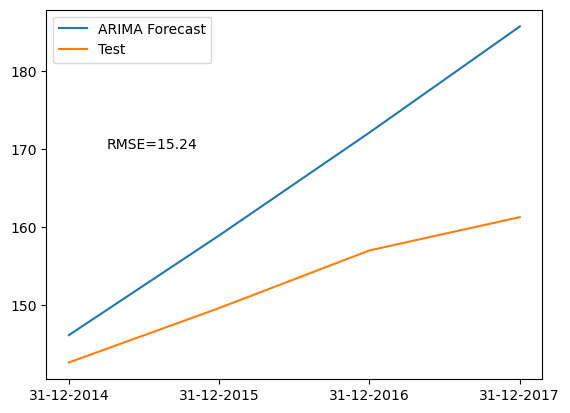

In [39]:
y_pred = model.predict(n_periods=len(y_test))
y_pred.index = y_test.index
error = round(root_mean_squared_error(y_test, y_pred), 2)
plt.text(0.25,170, "RMSE="+str(error))
plt.plot(y_pred, label='ARIMA Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

**Predicting for next 3 years** 

In [41]:
wgem = pd.read_csv("WGEM-IND_CPTOTNSXN.csv",index_col=0)
y = wgem['Value']
holt = Holt(y)
fit1 = holt.fit()
fcast1 = fit1.forecast(3)
fcast1.index = pd.DatetimeIndex( fcast1.index, yearfirst=True ).to_period("Y")
y.index = pd.DatetimeIndex( y.index, dayfirst=True ).to_period("Y")

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


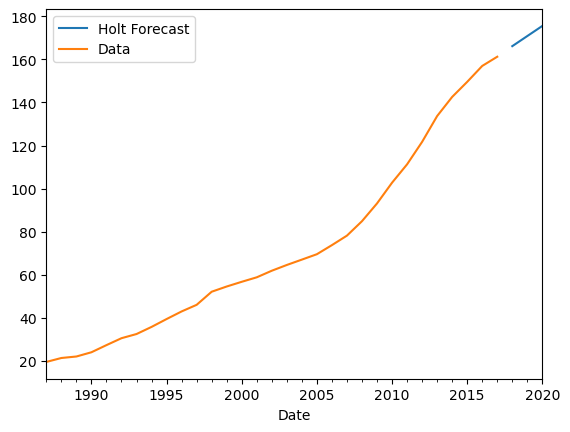

In [42]:
fcast1.plot(label='Holt Forecast')
y.plot(label='Data')
plt.legend(loc='best')
plt.show()